**GOLD PRICE PREDICTION**
* *PROJECT 9*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
gold_data = pd.read_csv('gold.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

our gold_data DataFrame has a Date column of type object, which is causing the issue. Since correlation calculations only work on numeric data, you need to exclude the Date column.

In [9]:
correlation = gold_data.drop(columns=['Date']).corr()

<Axes: >

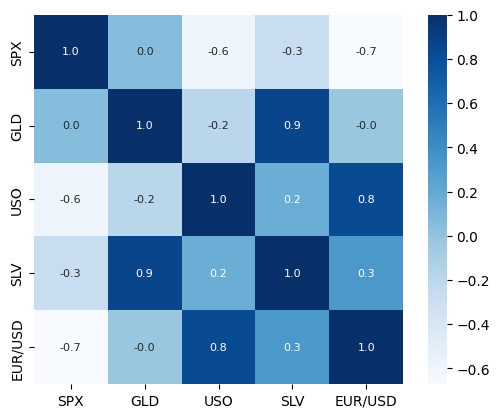

In [16]:
#contructing a heatmap to understand the correlation
plt.Figure(figsize=(8,8))
sns.heatmap(correlation,
            cbar=True, #colour bar
            square=True, #sq format
            fmt='.1f', #only one decimal point
            annot=True, #name of the columns
            annot_kws={'size':8}, #columns size
            cmap='Blues' #colour
            )

In [17]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


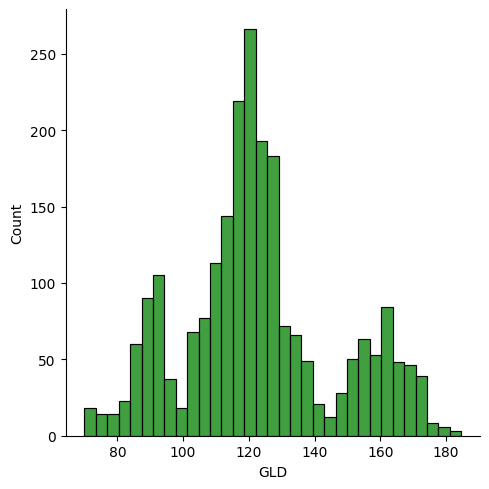

In [19]:
#check the distribution of the gold price
sns.displot(gold_data['GLD'],color='green')

splitting the features and target

In [22]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into Training data and Test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

*Model Evaluation*

In [32]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.57719942  81.97369998 115.65550052 127.48180093 120.61090137
 154.62419784 150.19089795 126.28650027 117.56309876 125.98130052
 116.79650066 172.34940016 141.88819873 167.83509855 115.02670016
 118.13130056 139.56200254 170.11540074 159.36760322 157.21579901
 155.13310036 125.26910038 176.99530009 157.15200367 125.3021006
  93.6458995   76.74320024 120.68039976 119.00599896 167.19609925
  88.26130059 125.21880031  91.26080053 117.71429999 121.16679889
 136.6809009  115.59010088 115.51150101 146.62809918 106.84180099
 104.36430247  87.15319778 126.43260072 117.69430015 153.20169878
 119.61629987 108.40449945 108.0372983   93.22060057 126.91709829
  75.28730025 113.59719914 121.06649994 111.12309926 118.91369913
 120.9119994  159.76199989 167.23520155 146.88919693  85.7237984
  94.39800067  86.84299897  90.55710034 118.88410061 126.3195005
 127.58680013 169.63680003 122.18969928 117.05949937  98.92790018
 168.09120108 143.14579779 132.3411025  121.08340247 121.46529979
 119.6943007 

In [37]:
# R sq error
error_score = metrics.r2_score(Y_test, test_data_prediction) #real vs predicted data
print("R sq error : ", error_score)

R sq error :  0.9888402937999491


*Compare the actual and predicted values in a plot*

In [38]:
Y_test = list(Y_test)

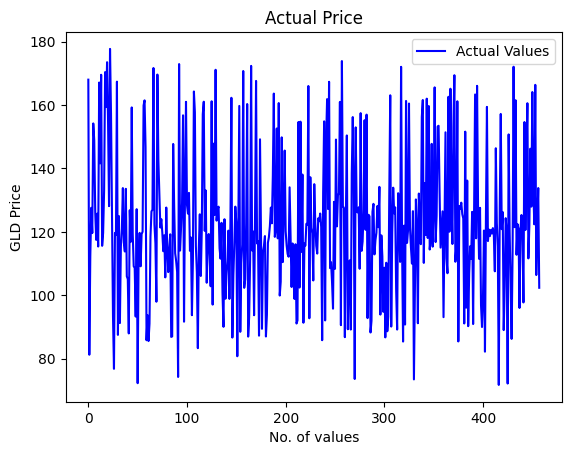

In [47]:
plt.plot(Y_test, color='blue', label = 'Actual Values')
#plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

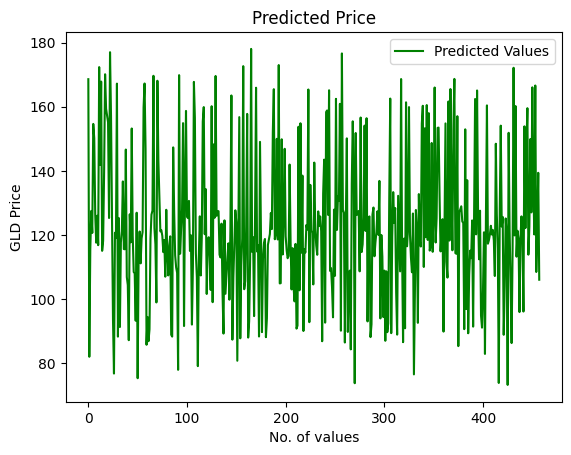

In [48]:
#plt.plot(Y_test, color='blue', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

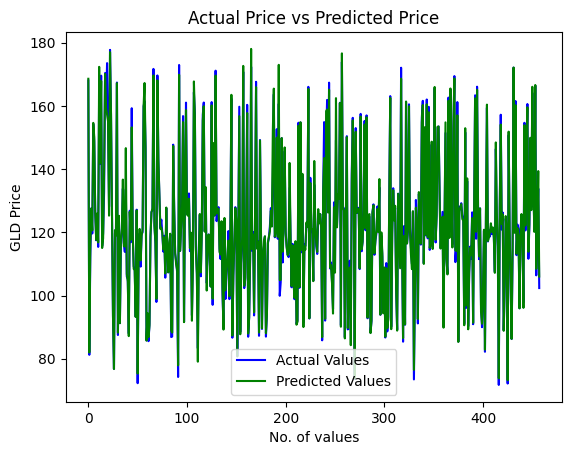

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()